# Code Begins Here:

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch import autograd
import torch.nn.functional as F

Importing and Preparing Data

In [29]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
label_ids,count=np.unique(labels,return_counts=True)
print(label_ids,count)


(array([0, 1, 2, 3, 4], dtype=uint8), array([10000, 10000, 10000, 10000, 10000]))


In [30]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_normal=np.ndarray(shape=shape_images_flat)

# normalizing images
for index in range(len(images)):
    images_normal[index]=((images[index]-images[index].mean())/images[index].std()).flat

#  braking data set into train,validation and test sets
train_images=images_normal[0:40000]
train_labels=labels[0:40000]

validation_images=images_normal[40000:45000]
validation_labels=labels[40000:45000]

test_images=images_normal[45000:50000]
test_labels=labels[45000:50000]



In [44]:
HEIGHT,WIDTH=26,26
NUM_CLASSES=5
batch_size=10
NUM_OPT_STEPS=5000
NUM_HIDDEN_UNITS=100
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

In [45]:
class TwoLayerNN(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNN,self).__init__()
        self.model=torch.nn.Sequential(
        torch.nn.Linear(HEIGHT*WIDTH,NUM_HIDDEN_UNITS),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS, NUM_CLASSES)
        )
        
    def forward(self, x):
        return self.model(x)

In [46]:
model=TwoLayerNN()
print(model)

TwoLayerNN (
  (model): Sequential (
    (0): Linear (676 -> 100)
    (1): ReLU ()
    (2): Linear (100 -> 5)
  )
)


In [47]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)


In [48]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_images[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    
    optimizer.step()
    return loss.data[0]


In [49]:
def accuracy(y, y_hat):
    a=(y==y_hat)
    return a.astype(np.float).mean()

In [50]:
def approx_accuracy(curr_images,curr_labels,length=-1):
    if length==-1:
        length=len(curr_images)
        
    shuffle_list=np.random.choice(len(curr_images), length)
    shuffled_images=curr_images[shuffle_list]
    shuffled_labels=curr_labels[shuffle_list]
    
    x = autograd.Variable(torch.from_numpy(shuffled_images.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(shuffled_labels.astype(np.int)))
    _,y_hat =torch.max(model(x),1)
    # print(y_hat.size())
    return accuracy(y.data.numpy(), y_hat.data.numpy())
         

In [51]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


     0  0.24  0.24
   100  0.73  0.73
   200  0.74  0.73
   300  0.75  0.74
   400  0.79  0.78
   500  0.76  0.77
   600  0.80  0.78
   700  0.81  0.78
   800  0.79  0.80
   900  0.81  0.80
  1000  0.78  0.79
  1100  0.83  0.80
  1200  0.82  0.79
  1300  0.78  0.79
  1400  0.83  0.80
  1500  0.83  0.81
  1600  0.82  0.81
  1700  0.82  0.80
  1800  0.84  0.82
  1900  0.81  0.82
  2000  0.82  0.81
  2100  0.83  0.81
  2200  0.83  0.81
  2300  0.82  0.82
  2400  0.84  0.82
  2500  0.83  0.82
  2600  0.84  0.80
  2700  0.82  0.83
  2800  0.85  0.81
  2900  0.85  0.82
  3000  0.84  0.83
  3100  0.84  0.82
  3200  0.83  0.80
  3300  0.85  0.83
  3400  0.84  0.83
  3500  0.85  0.83
  3600  0.88  0.84
  3700  0.83  0.84
  3800  0.87  0.83
  3900  0.85  0.83
  4000  0.87  0.84
  4100  0.86  0.84
  4200  0.86  0.83
  4300  0.86  0.83
  4400  0.86  0.82
  4500  0.85  0.84
  4600  0.87  0.84
  4700  0.87  0.84
  4800  0.88  0.83
  4900  0.86  0.84


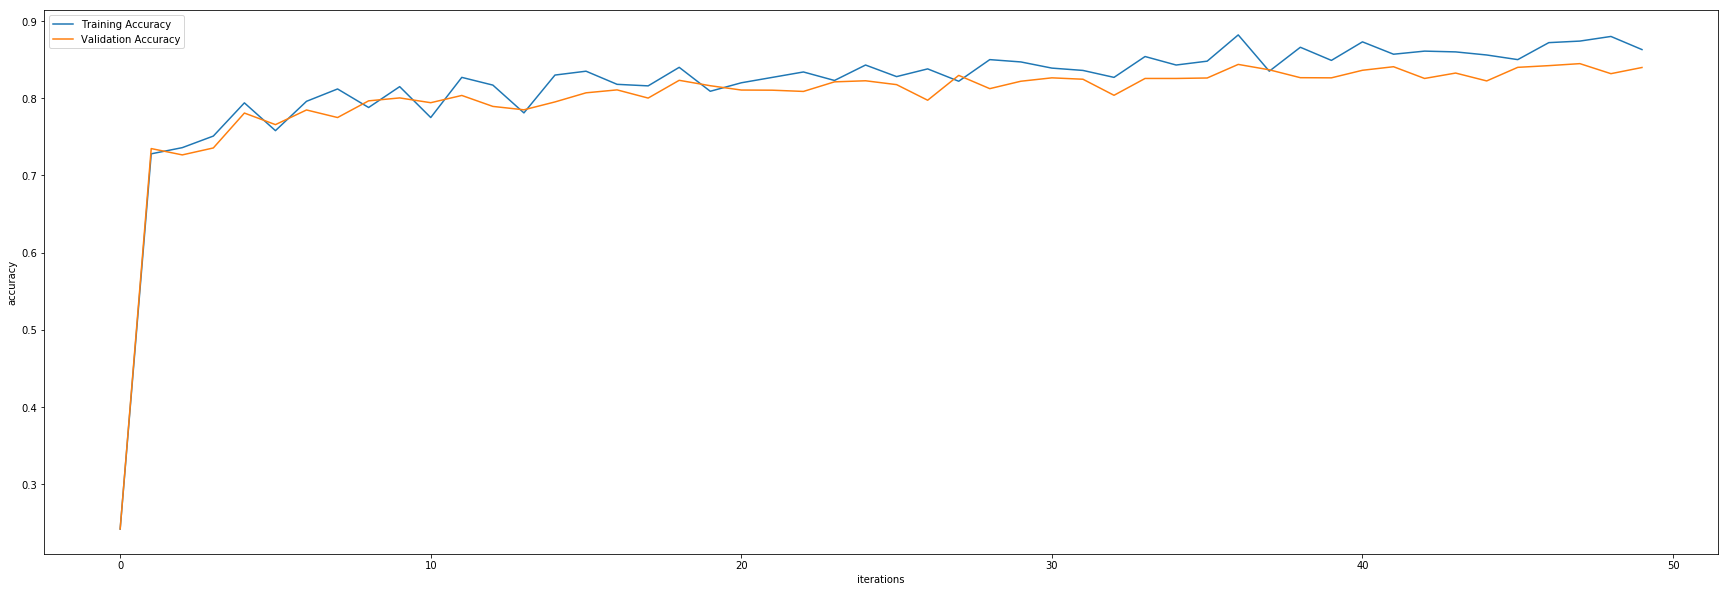

In [52]:
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

## With Batch Size 10

In [66]:
batch_size=10
NUM_OPT_STEPS=5000
NUM_HIDDEN_UNITS=100
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

model=TwoLayerNN()
print(model)

TwoLayerNN (
  (model): Sequential (
    (0): Linear (676 -> 100)
    (1): ReLU ()
    (2): Linear (100 -> 5)
  )
)


In [67]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)


In [68]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


     0  0.23  0.22
   100  0.71  0.71
   200  0.76  0.73
   300  0.76  0.75
   400  0.77  0.76
   500  0.80  0.77
   600  0.77  0.76
   700  0.80  0.78
   800  0.81  0.80
   900  0.79  0.80
  1000  0.79  0.80
  1100  0.80  0.77
  1200  0.81  0.80
  1300  0.80  0.80
  1400  0.82  0.81
  1500  0.80  0.80
  1600  0.82  0.80
  1700  0.86  0.82
  1800  0.84  0.81
  1900  0.84  0.81
  2000  0.85  0.81
  2100  0.84  0.82
  2200  0.84  0.81
  2300  0.82  0.82
  2400  0.83  0.81
  2500  0.84  0.82
  2600  0.82  0.82
  2700  0.85  0.81
  2800  0.85  0.83
  2900  0.85  0.83
  3000  0.85  0.82
  3100  0.85  0.81
  3200  0.85  0.83
  3300  0.82  0.82
  3400  0.88  0.83
  3500  0.83  0.83
  3600  0.83  0.82
  3700  0.88  0.83
  3800  0.84  0.83
  3900  0.85  0.84
  4000  0.86  0.84
  4100  0.87  0.83
  4200  0.86  0.83
  4300  0.86  0.84
  4400  0.86  0.83
  4500  0.85  0.81
  4600  0.85  0.83
  4700  0.88  0.82
  4800  0.87  0.83
  4900  0.85  0.83


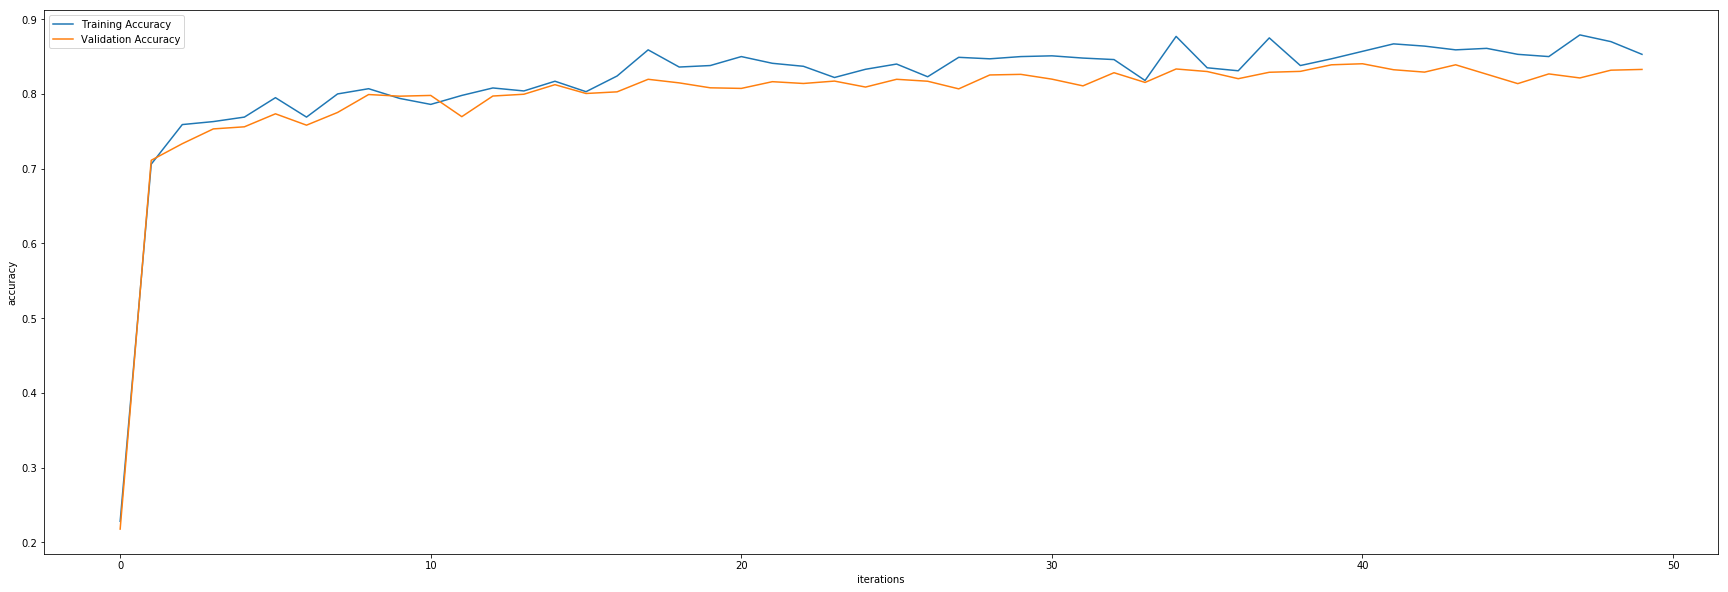

In [71]:
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

In [132]:
batch_size=40
NUM_OPT_STEPS=10000
lr=1e-3
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

model=TwoLayerNN()
print(model)

TwoLayerNN (
  (model): Sequential (
    (0): Linear (676 -> 30)
    (1): ReLU ()
    (2): Linear (30 -> 5)
  )
)


In [133]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)


In [134]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


     0  0.26  0.24
   100  0.72  0.73
   200  0.80  0.77
   300  0.78  0.78
   400  0.80  0.79
   500  0.78  0.80
   600  0.80  0.80
   700  0.79  0.81
   800  0.80  0.78
   900  0.82  0.80
  1000  0.81  0.81
  1100  0.83  0.81
  1200  0.80  0.81
  1300  0.85  0.82
  1400  0.84  0.82
  1500  0.83  0.82
  1600  0.87  0.83
  1700  0.85  0.83
  1800  0.84  0.83
  1900  0.85  0.82
  2000  0.86  0.83
  2100  0.84  0.83
  2200  0.86  0.82
  2300  0.86  0.83
  2400  0.86  0.83
  2500  0.84  0.82
  2600  0.85  0.83
  2700  0.85  0.83
  2800  0.86  0.84
  2900  0.86  0.83
  3000  0.86  0.83
  3100  0.84  0.83
  3200  0.85  0.83
  3300  0.87  0.83
  3400  0.88  0.84
  3500  0.87  0.82
  3600  0.87  0.82
  3700  0.85  0.83
  3800  0.88  0.83
  3900  0.87  0.82
  4000  0.85  0.82
  4100  0.88  0.83
  4200  0.86  0.81
  4300  0.85  0.84
  4400  0.87  0.84
  4500  0.85  0.82
  4600  0.88  0.83
  4700  0.87  0.83
  4800  0.86  0.83
  4900  0.86  0.82
  5000  0.85  0.83
  5100  0.86  0.84
  5200  0.85

  9999  0.90  0.83


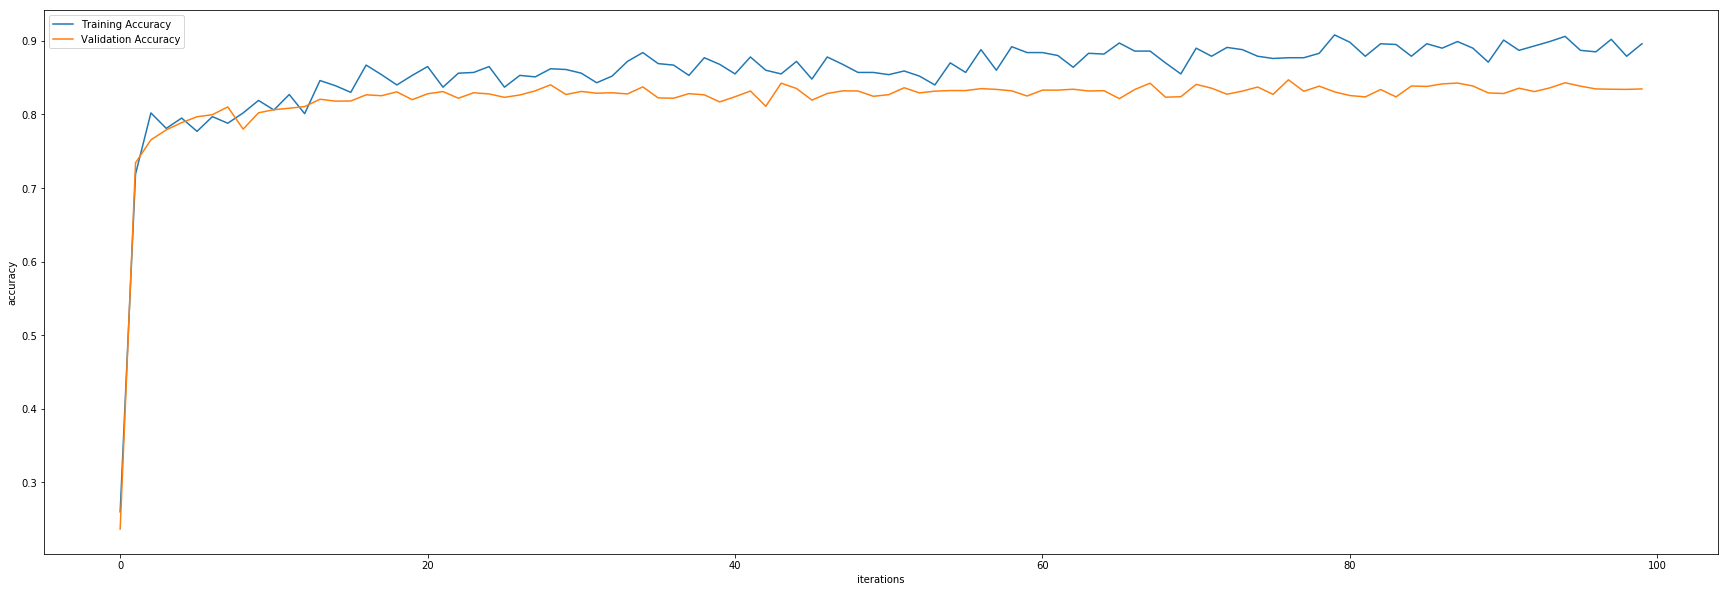

In [136]:
print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

# Highest train and validation accuracies obtained. 
The train and validation accuracies obtained were : 0.91 0.83

batch_size=40

NUM_OPT_STEPS=10000

lr=1e-3